성능 평가 기법

In [38]:
# data load
import numpy as np
import pandas as pd
np.random.seed(98)
# 임의의 데이터 생성
real = np.random.randint(1,100,10)
pred = real.copy()+2
df = pd.DataFrame({'real':real,'pred':pred})

In [39]:
# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(real,pred)
print(mae)

mae = np.sum(np.abs(real-pred))/len(real)
print(mae)

2.0
2.0


In [41]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real,pred)
print(mse)

mse = np.sum((real-pred)**2)/len(real)
print(mse)

4.0
4.0


In [43]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(real,pred))
print(rmse)

rmse = np.sqrt(np.sum((real-pred)**2)/len(real))
print(rmse)

2.0
2.0


In [52]:
# MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(real,pred)
print(msle)

# 교재 수식과 차이점이 있음
# msle = np.log(np.sum((real-pred)**2)/len(real))  ->>> 교재 
msle = np.sum((np.log(real)-np.log(pred))**2)/len(real) #->>> sklearn
print(msle)

0.0010374654715604417
1.3862943611198906


In [76]:
# MAE
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(real,pred) *100
print(mape)

#교재 
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
    return mape
print(MAPE(real,pred))

# 수식 참고고
mape = np.sum(np.abs((real-pred)/real))/len(real)*100
print(mape)

3.197852182078435
3.197852182078435
3.197852182078435


In [90]:
# data load
import numpy as np
import pandas as pd
np.random.seed(98)
# 임의의 데이터 생성
real = np.random.randint(0,2,100)
pred = real.copy()
pred[:10] = 1
df = pd.DataFrame({'real':real,'pred':pred})

In [104]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real,pred)

def confusion_matrix_self(real,pred):
    TP = np.sum((real ==1) & (pred==1))
    TN = np.sum((real ==0) & (pred==0))
    FP = np.sum((real ==0) & (pred==1))
    FN = np.sum((real ==1) & (pred==0))
    return TP,TN,FP,FN
TP,TN,FP,FN = confusion_matrix_self(real,pred)
print(cm)
print(TN,FP,FN,TP)

[[39  5]
 [ 0 56]]
39 5 0 56


In [103]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(real,pred)
print(acc)

acc = (TP + TN) / (TP+TN+FP+FN)
print(acc)

0.95
0.95


In [109]:
# precision
from sklearn.metrics import precision_score
precision = precision_score(real,pred)
print(precision)

precision = TP/(TP+FP)
print(precision)

0.9180327868852459
0.9180327868852459


In [111]:
# recall
from sklearn.metrics import recall_score
recall = recall_score(real,pred)
print(recall)

recall = TP/(TP+FN)
print(recall)

1.0
1.0


In [115]:
# F1 score

from sklearn.metrics import f1_score
f1 = f1_score(real,pred)
print(f1)

f1 = 2*(precision*recall)/(precision+recall)
print(f1)

0.9572649572649572
0.9572649572649572


fpr :  [0.         0.11363636 1.        ]
tpr : [0. 1. 1.]


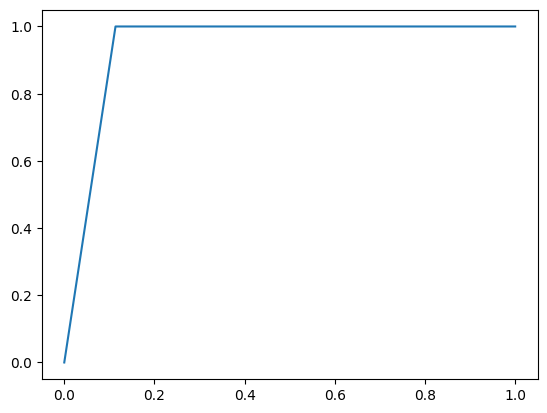

In [126]:
# ROC 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,thres = roc_curve(real,pred,pos_label=1)
print('fpr : ',fpr)
print('tpr :',tpr)
plt.plot(fpr,tpr)
plt.show()

In [128]:
# AUC 
from sklearn.metrics import roc_curve,auc

fpr,tpr,thres = roc_curve(real,pred,pos_label=1)
auc = auc(fpr,tpr)
print(auc)

0.9431818181818181


머신러닝 회귀분석

In [23]:
import pandas as pd
# boston_dt = boston.data
# price = boston.target

# df = pd.DataFrame(boston_dt, columns=boston.feature_names)
# df['PRICE'] = price

# URL로 Boston Housing Dataset 로드
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)
boston.rename(columns={'medv':'PRICE'}, inplace=True)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston.shape

(506, 14)

In [26]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [28]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
PRICE      0
dtype: int64

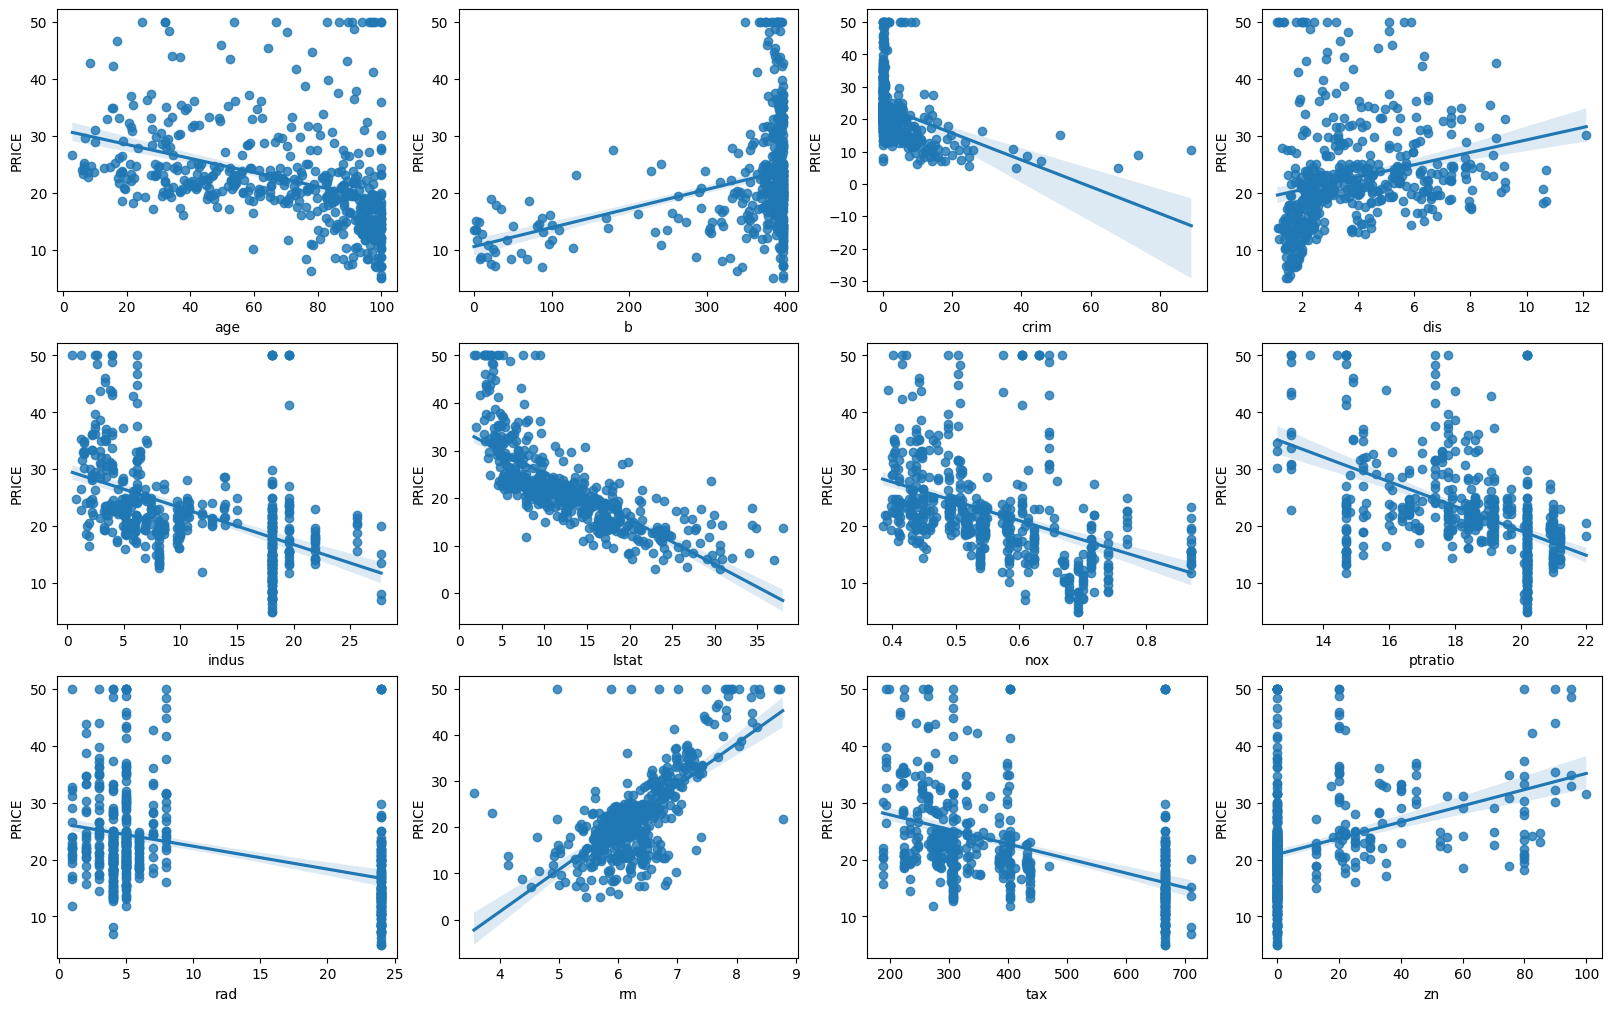

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16,10), ncols=4, nrows=3, constrained_layout = True)
features = boston.columns.difference(['PRICE','chas'])

for i, feature in zip(range(12), features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y=boston['PRICE'], data=boston, ax=axs[row][col])

In [40]:
from sklearn.model_selection import train_test_split
x = boston.drop(columns='PRICE')
y = boston['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [41]:
print('학습데이터세트 PRICE 평균', y_train.mean())
print('평가데이터세트 PRICE 평균', y_test.mean())

학습데이터세트 PRICE 평균 22.796534653465343
평가데이터세트 PRICE 평균 21.488235294117644


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [44]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train,pred_train)
mse = mean_squared_error(y_train,pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,pred_train)

print('MAE : ',mae)
print('MSE : ',mse)
print('RMSE : ',rmse)
print('R2 score : ', r2)

MAE :  3.31477162678323
MSE :  21.641412753226312
RMSE :  4.6520331848801675
R2 score :  0.7508856358979673


In [47]:
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [48]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE : ',mae)
print('MSE : ',mse)
print('RMSE : ',rmse)
print('R2 score : ',r2)

MAE :  3.1890919658878465
MSE :  24.29111947497352
RMSE :  4.928602182665337
R2 score :  0.668759493535632


In [49]:
pred_df = pd.DataFrame(pred,columns=['pred_price'])
pred_df.head()

,pred_price
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880


In [51]:
actual = pd.DataFrame(y_test, columns=['actual_Price'])
actual.head()

,actual_Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [52]:
reg_result = pd.concat([actual,pred_df], axis=1)
reg_result.to_csv('reg_result', index=False, encoding = 'utf-8-sig')
reg_result.head()

,actual_Price,pred_price
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880


머신러닝 분류분석

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_dt = iris.data
iris_label = iris.target

df = pd.DataFrame(data = iris_dt, columns = iris.feature_names)
df['label'] = iris_label

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['label'].unique()

array([0, 1, 2])

In [6]:
df.shape

(150, 5)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(iris_dt,iris_label, test_size = 0.2, random_state= 0, stratify = iris_label)

In [14]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(dtree_clf_5,x_train,y_train, scoring='accuracy', cv=10)
print('교차 검증 정확도', np.round(scores,3))
print('평균 검중 정확도', np.round(np.mean(scores),3))

교차 검증 정확도 [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균 곰중 정확도 0.942


In [17]:
scores = cross_val_score(dtree_clf_3, x_train,y_train, scoring='accuracy', cv=10)
print('교차 검증 정확도', np.round(scores,3))
print('평균 검증 정확도', np.round(np.mean(scores),3))

교차 검증 정확도 [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도 0.925


In [18]:
scores = cross_val_score(dtree_clf_1, x_train,y_train, scoring='accuracy', cv=10)
print('교차 검증 정확도', np.round(scores,3))
print('평균 검증 정확도',np.round(np.mean(scores),3))

교차 검증 정확도 [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도 0.667


In [19]:
dtree_clf_5.fit(x_train,y_train)
pred =dtree_clf_5.predict(x_test)
from sklearn.metrics import accuracy_score
print('의사결정나무 CV 진행후 예측 정확도 : ',accuracy_score(y_test,pred))

의사결정나무 CV 진행후 예측 정확도 :  0.9666666666666667


In [20]:
pred = pd.DataFrame(pred,columns=['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


In [21]:
actual = pd.DataFrame(y_test, columns=['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


In [23]:
classify_result = pd.concat([actual,pred],axis=1)
classify_result.to_csv('clf_result.csv',index=False,encoding='utf-8-sig')
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0


In [34]:
import numpy as np
# 분산구하기
df = np.arange(1,10,2)
print(df)
df_mean = df.mean()
print(df_mean)

print(((df- df_mean)**2).sum()/(len(df)-1))

[1 3 5 7 9]
5.0
10.0


In [36]:
np.var(df,ddof=1)

10.0

In [37]:
np.sqrt(sum((df- df_mean)**2)/(5-1))

3.1622776601683795

In [17]:
import pandas as pd
pd.DataFrame(df).describe()

,0
count,5.000000
mean,5.000000
std,3.162278
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [33]:
pd.DataFrame(df)

,0
0,1
1,3
2,5
3,7
4,9
